# Salary Prediction Classification - Project TXAI

Authors:
- Martín Romero Romero
- Valentina Isabel de la Milagrosa Ortega Pinto
## Data Processing

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import scipy.stats as ss

In [2]:
csv_file_path='data/salary.csv'
df = pd.read_csv(csv_file_path)

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df = df.drop(columns=['capital-gain','capital-loss','education'])

In [5]:
df['salary'] = df['salary'].str.strip()
df['salary_binary'] = df['salary'].apply(lambda x: 1 if '>50K' in x else 0)

In [6]:
df

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary_binary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,0
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,1
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,0
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,0


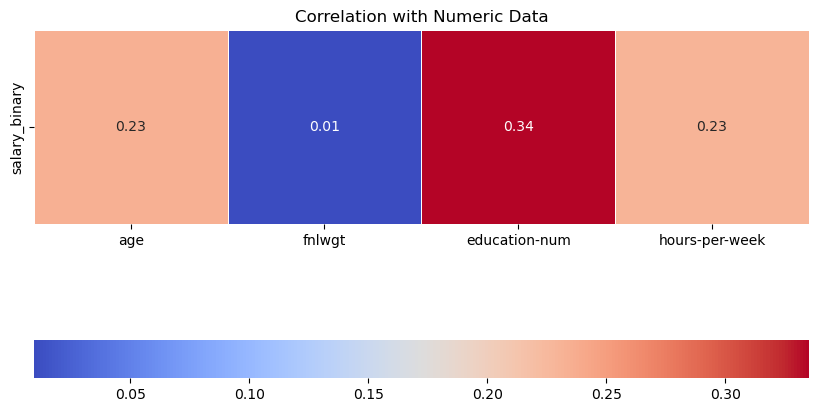

In [7]:
##Correalation Matrix with Numerical Data
df_with_edu = df.drop(['workclass','marital-status', 'occupation','relationship', 'race', 'sex', 'native-country','salary'], axis=1)
corr_matrix = df_with_edu.corr().abs()
# Lets plot only correlation with the class, without considering itself for better localization of the most correlated features
target_corr = corr_matrix.iloc[:-1, -1]

# Creating a df for using seaborn
target_corr_df = target_corr.to_frame().transpose()

plt.figure(figsize=(10, 10))
sns.heatmap(target_corr_df, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"orientation": "horizontal"})
plt.title('Correlation with Numeric Data')
plt.show()


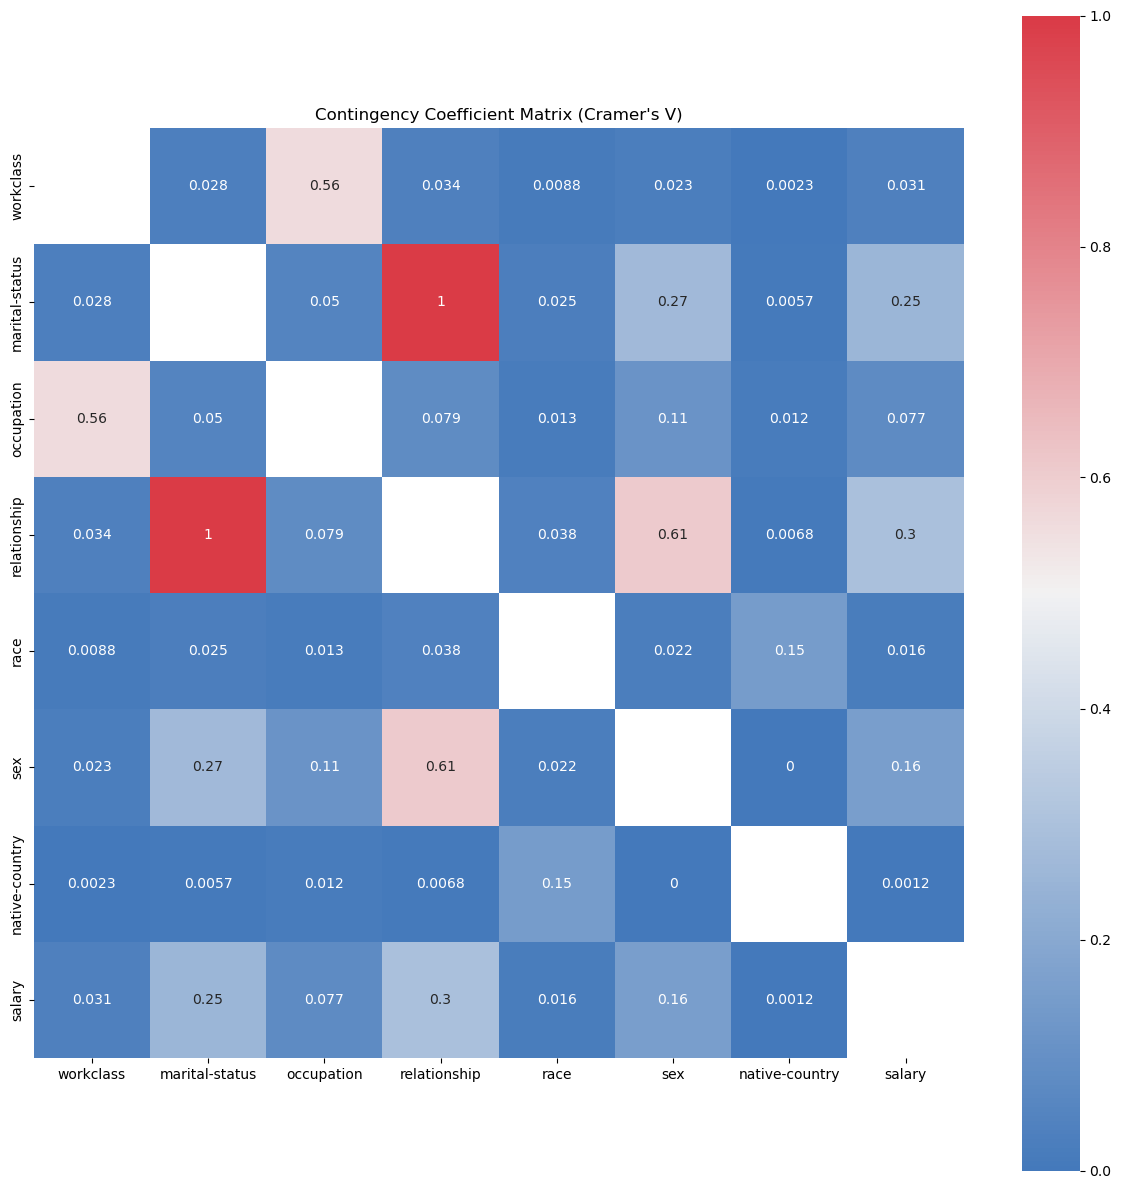

In [8]:
df_without_num=df.drop(['age','fnlwgt','education-num','hours-per-week', 'salary_binary'],axis=1)
column_combinations = list(itertools.combinations(df_without_num.columns, 2))

# Inicializar un DataFrame para almacenar los coeficientes de contingencia
df_corr = pd.DataFrame(index=df_without_num.columns, columns=df_without_num.columns)

# Calcular el coeficiente de contingencia para cada par de columnas
for col1, col2 in column_combinations:
    contingency_matrix = pd.crosstab(df_without_num[col1], df_without_num[col2])
    cramers_v = ss.chi2_contingency(contingency_matrix)[0] / (sum(contingency_matrix.shape) - 1)
    df_corr.loc[col1, col2] = cramers_v
    df_corr.loc[col2, col1] = cramers_v  # La matriz es simétrica

# Normalizar los valores entre 0 y 1
df_corr = df_corr.astype(float)
df_corr = (df_corr - df_corr.min().min()) / (df_corr.max().max() - df_corr.min().min())

# Crear un mapa de colores divergentes
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Mostrar la matriz de correlación con un mapa de colores
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, annot=True, cmap=cmap, vmin=0, vmax=1, square=True)
plt.title('Contingency Coefficient Matrix (Cramer\'s V)')
plt.show()